In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import cm
%matplotlib inline  

import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.api as sm 
import statsmodels.formula.api as smf
import scikit_posthocs as sp


pd.options.display.float_format = '{:.5f}'.format

# 1 - Open Dataset 

In [4]:
file = r"C:\Users\00203885\OneDrive - CERVEJARIA PETROPOLIS SA\PARTICULAR\DOCUMENTOS\PosFacens BigData\Fundamentos de Programação e Estatística\Trabalho\houses_to_rent_v2.csv"

df= pd.read_csv(file)

#Doing a rough filter:  droping duplicates, changing column floor, dropping unecessary column
df.drop_duplicates(inplace=True)
df['floor']=df['floor'].replace('-',0).astype(int)

#Column total (R$) is not going to be used since it`s represent the sum of the other columns
df.drop('total (R$)', axis=1, inplace=True)

df.head()





,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11


In [5]:
cols = ['area', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)']
cols2 = ['rooms', 'bathroom', 'parking spaces', 'floor',]

cols+cols2

['area',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'rooms',
 'bathroom',
 'parking spaces',
 'floor']

# 2 -  Filtering Dataset usign IQR

In [6]:
f =(df.quantile(.75) + (1.5*(df.quantile(.75) - df.quantile(.25))))
print(f)

area                    386.50000
rooms                     4.50000
bathroom                  6.00000
parking spaces            3.50000
floor                    18.50000
hoa (R$)               2946.87500
rent amount (R$)      10102.62500
property tax (R$)       912.87500
fire insurance (R$)     143.50000
dtype: float64


In [7]:
#df2 is the name of the Dataframe already filtered
df2 = df[(df.area <= f['area']) & 
   (df.rooms <= f['rooms']) &
   (df['parking spaces'] <= f['parking spaces']) &
   (df['hoa (R$)']<=  f['hoa (R$)']) &
   (df['bathroom']<=  f['bathroom']) &
   (df['floor']<=  f['floor']) &
   (df['rent amount (R$)']<= f['rent amount (R$)'])& 
   (df['property tax (R$)']<= f['property tax (R$)']) &   
   (df['fire insurance (R$)']<= f['fire insurance (R$)'])]



df2.quantile(1)

area                    380.00000
rooms                     4.00000
bathroom                  6.00000
parking spaces            3.00000
floor                    18.00000
hoa (R$)               2914.00000
rent amount (R$)      10000.00000
property tax (R$)       903.00000
fire insurance (R$)     143.00000
Name: 1, dtype: float64

In [8]:
df2.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25


# 3. Relationship analysis and test if numeric values follow normal distribution

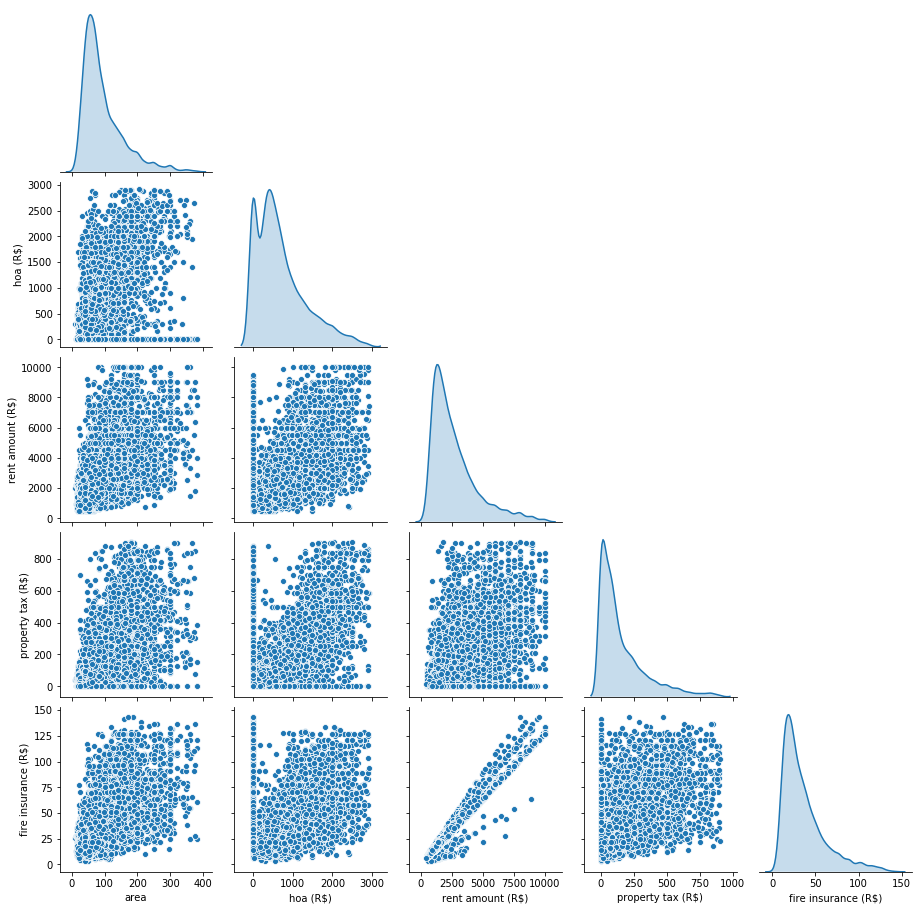

In [9]:
cols = ['area', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)']


sns.pairplot(df2[cols],diag_kind='kde',corner=True)

In [10]:
def DataNormalDistribTest(data):
    # Calculating the Anderson-Darling test
    ad_stat, ad_critico, ad_teorico = stats.anderson(data, 'norm')

    print("At " + str(100 - ad_teorico[2]) + "% confidence level, the statistic value of the Anderson-Darling test is = " + str(ad_critico[2]))
    print("The statistic value calculated for the Anderson-Darling test is = " + str(ad_stat))
    if ad_stat < ad_critico[2]:
        print("At " + str(100 - ad_teorico[2]) + "% confidence level, we have NO evidence to reject the hypothesis of data normality, according to the Anderson-Darling test")
    else:
        print("At " + str(100 - ad_teorico[2]) + "% confidence level, we have evidence to reject the hypothesis of data normality, according to the Anderson-Darling test")

        
for column in cols:
    print("="*10)
    print(column)
    DataNormalDistribTest(df2[column])
    print('\n')

area
At 95.0% confidence level, the statistic value of the Anderson-Darling test is = 0.787
The statistic value calculated for the Anderson-Darling test is = 325.08506379086066
At 95.0% confidence level, we have evidence to reject the hypothesis of data normality, according to the Anderson-Darling test


hoa (R$)
At 95.0% confidence level, the statistic value of the Anderson-Darling test is = 0.787
The statistic value calculated for the Anderson-Darling test is = 225.9887833699704
At 95.0% confidence level, we have evidence to reject the hypothesis of data normality, according to the Anderson-Darling test


rent amount (R$)
At 95.0% confidence level, the statistic value of the Anderson-Darling test is = 0.787
The statistic value calculated for the Anderson-Darling test is = 328.293929245825
At 95.0% confidence level, we have evidence to reject the hypothesis of data normality, according to the Anderson-Darling test


property tax (R$)
At 95.0% confidence level, the statistic value of t

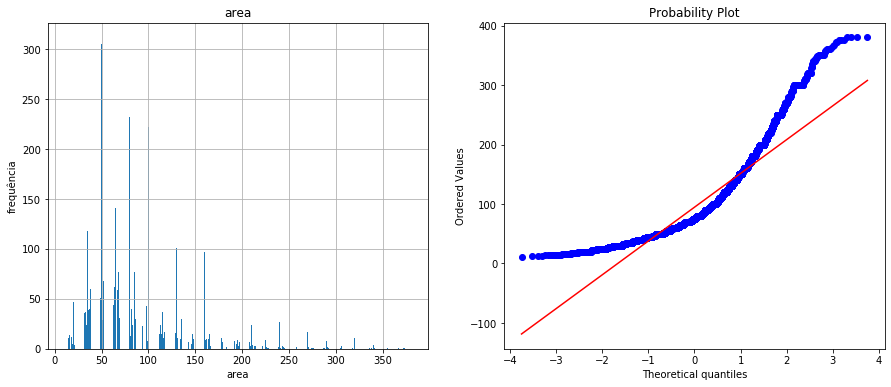

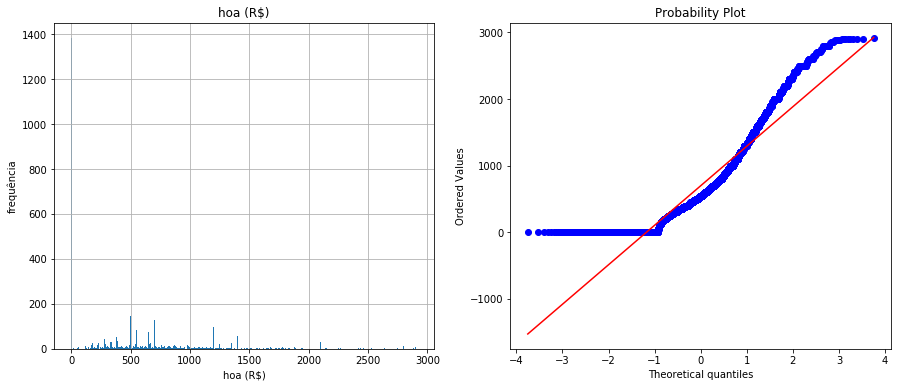

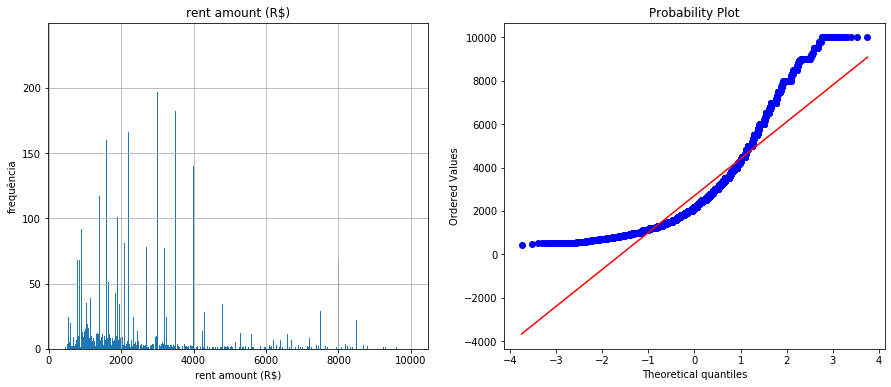

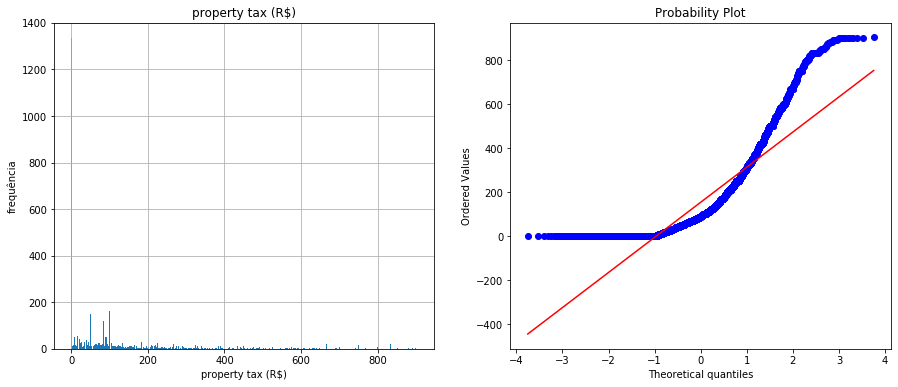

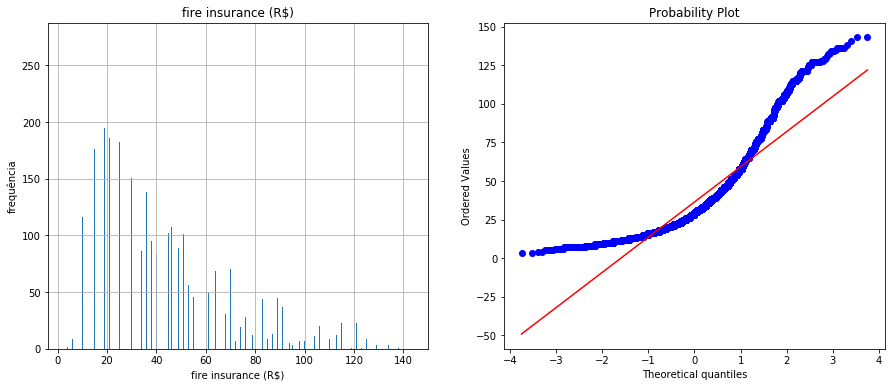

In [37]:
## Analisa a distribuição das variáveis contínuas através de histogramas
data=df2.copy()
for feature in cols:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    data[feature].hist(bins=1000)
    plt.xlabel(feature)
    plt.ylabel('frequência')
    plt.title(feature)
    plt.subplot(1,2,2)
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.show()

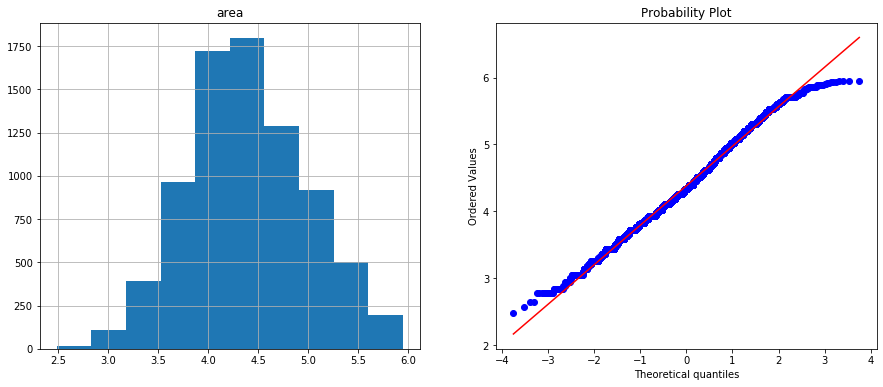

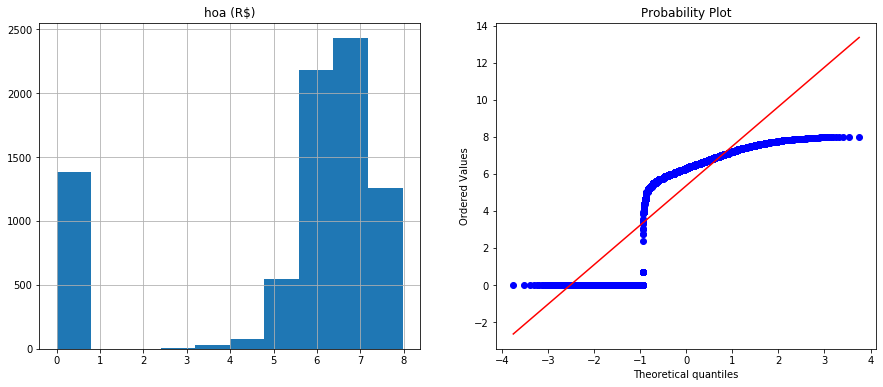

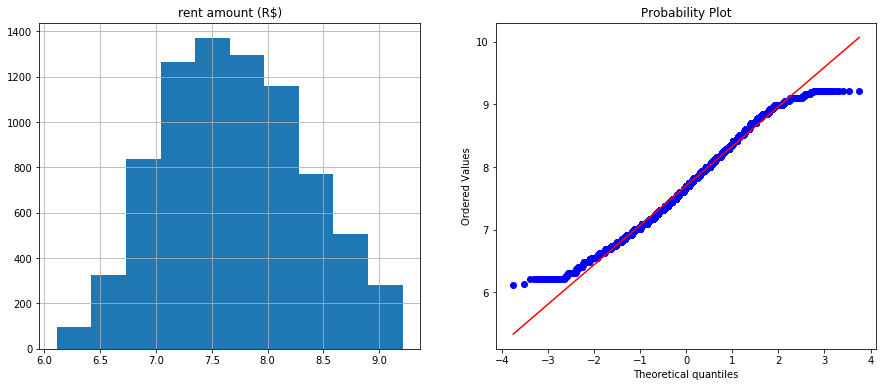

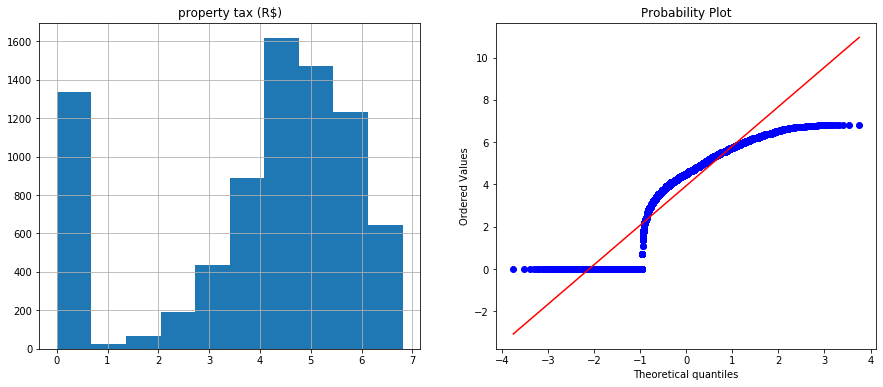

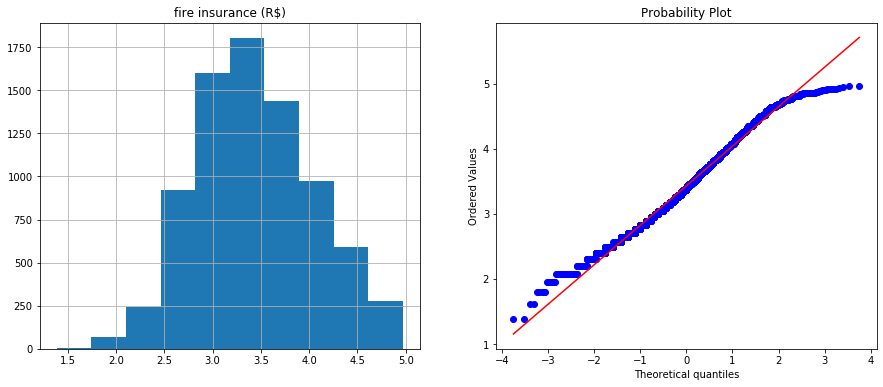

In [38]:
## Aplica transformação logarítimica nos dados

 

data=df2.copy()
for feature in cols:
    data[feature]=np.log(data[feature]+1)   
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title(feature)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature], dist="norm", plot=plt)
        
    plt.show()

# 4. Applying log to normalize dataset



In [11]:
#data[feature]=np.log(data[feature]+1)
dflog = df2.copy()
dflog[cols] = np.log(dflog[cols]+1)
dflog.head()



,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,São Paulo,4.26268,2,1,1,7,acept,furnished,7.63337,8.10198,5.35659,3.76120
2,Porto Alegre,4.39445,1,1,1,6,acept,not furnished,6.90875,7.93773,0.00000,3.73767
3,Porto Alegre,3.95124,2,1,0,2,acept,not furnished,5.60212,7.01481,3.13549,2.89037
4,São Paulo,3.25810,1,1,0,1,not acept,not furnished,0.00000,6.68586,3.25810,2.48491
6,Rio de Janeiro,4.29046,2,1,0,7,acept,not furnished,6.60800,7.55014,4.45435,3.25810


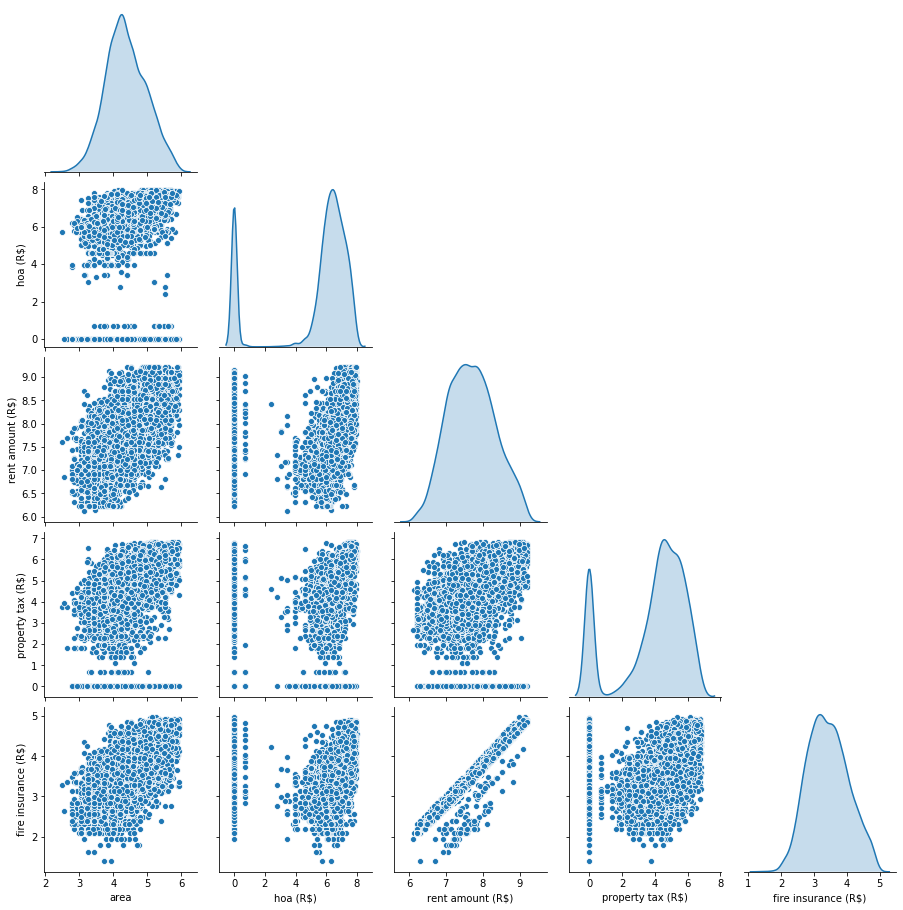

In [12]:
sns.pairplot(dflog[cols],diag_kind='kde',corner=True)

# Analyze of Variance 

In [13]:
def Anova_Analysis(f, P): 
    if P < 0.05:
        return "REJECTED Null hypothesis that the population median of all of the groups are equal."
    else: 
        return "NOT REJECTED Null hypothesis that the population median of all of the groups are equal."

In [14]:
'''A ANOVA não considera que os tratamentos tenham algum ordenamento específico
Para agregar esta informação na análise, usa-se a Análise de Regressã'

ANOVA com 2 tratamentos (r = 2) não deve ser realizada, uma vez que corresponde a um 
teste t homocedástico bilateral


City, animal, furniture
'''
furnit = df2['furniture'].apply(lambda x: 0 if x == 'furnished' else 1)
F, P = stats.kruskal(furnit, df2['rent amount (R$)'])
Anova_Analysis(F, P)


'REJECTED Null hypothesis that the population median of all of the groups are equal.'

In [15]:
CityC = df2['city'].astype('category').cat.codes
F, P = stats.kruskal(CityC, df2['rent amount (R$)'])
Anova_Analysis(F, P)


'REJECTED Null hypothesis that the population median of all of the groups are equal.'

In [16]:
ani = df2['animal'].apply(lambda x: 0 if x == 'accept' else 1)
F, P = stats.kruskal(ani, df2['rent amount (R$)'])
Anova_Analysis(F, P)

'REJECTED Null hypothesis that the population median of all of the groups are equal.'

In [17]:
#https://readthedocs.org/projects/scikit-posthocs/downloads/pdf/latest/
df_dunn = df2[['city','rent amount (R$)']]
df_dunn['city_Codes'] = df_dunn['city'].astype('category').cat.codes
test = sp.posthoc_dunn(df_dunn, group_col = 'city_Codes',val_col = 'rent amount (R$)', p_adjust = 'holm')

C:\Users\00203885\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
test.columns = ['Belo Horizonte','Campinas', 'Porto Alegre', 'Rio de Janeiro', 'São Paulo']
test.index = ['Belo Horizonte','Campinas','Porto Alegre', 'Rio de Janeiro', 'São Paulo']

test

,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo
Belo Horizonte,-1.00000,0.00000,0.00000,0.00000,0.00000
Campinas,0.00000,-1.00000,0.00163,0.00000,0.00000
Porto Alegre,0.00000,0.00163,-1.00000,0.00000,0.00000
Rio de Janeiro,0.00000,0.00000,0.00000,-1.00000,0.00000
São Paulo,0.00000,0.00000,0.00000,0.00000,-1.00000


# Start Prediction

In [19]:
#Changing object columns to numeric
'''
Column Animal: 
    Not acept = 0
    acept = 1
    
Column furniture:
    not furnished = 0
    furnished = 1
'''

cleanup_nums = {"animal":     {"not acept": 0, "acept": 1},
                "furniture": {"not furnished": 0, "furnished": 1}}

dflog.replace(cleanup_nums, inplace=True)


In [20]:
#Create new column to identify if it`s a house or appartment
dflog['House'] = dflog['floor'].apply(lambda x: 1 if x==0 else 0)

In [21]:
# One Hot enconding city 
df_final = pd.get_dummies(data =dflog,columns=['city'],prefix='city',drop_first=True)
df_final.head()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),House,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo
0,4.26268,2,1,1,7,1,1,7.63337,8.10198,5.35659,3.76120,0,0,0,0,1
2,4.39445,1,1,1,6,1,0,6.90875,7.93773,0.00000,3.73767,0,0,1,0,0
3,3.95124,2,1,0,2,1,0,5.60212,7.01481,3.13549,2.89037,0,0,1,0,0
4,3.25810,1,1,0,1,0,0,0.00000,6.68586,3.25810,2.48491,0,0,0,0,1
6,4.29046,2,1,0,7,1,0,6.60800,7.55014,4.45435,3.25810,0,0,0,1,0


# Model Setup

In [22]:
X = df_final[['city_São Paulo', 
              'city_Rio de Janeiro', 
              'city_Campinas',
              'city_Porto Alegre',              
              'area',
              'bathroom', 
              'parking spaces',
              'animal',
               'rooms',
              'furniture',
              'hoa (R$)',
              'property tax (R$)',
              'fire insurance (R$)',
              'House']]

Y = df_final['rent amount (R$)']

In [23]:
# For all 
Xt = sm.add_constant(X)
model = sm.OLS(Y,Xt).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       rent amount (R$)   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.747e+04
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:03:15   Log-Likelihood:                 6090.4
No. Observations:                7905   AIC:                        -1.215e+04
Df Residuals:                    7890   BIC:                        -1.205e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.1852    

In [24]:
#Removing the columns which the analysis above showed not to be relevant

X = df_final[['city_São Paulo', 
              'city_Rio de Janeiro', 
              'city_Campinas',
              'city_Porto Alegre',              
              'area',
              'bathroom', 
              'parking spaces',
#               'animal',
#               'rooms',
              'furniture',
              'hoa (R$)',
              'property tax (R$)',
              'fire insurance (R$)',
              'House']]

In [25]:
# For all 
Xt = sm.add_constant(X)
model = sm.OLS(Y,Xt).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       rent amount (R$)   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 2.038e+04
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:03:15   Log-Likelihood:                 6089.1
No. Observations:                7905   AIC:                        -1.215e+04
Df Residuals:                    7892   BIC:                        -1.206e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.1882    

In [26]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [27]:
linearRegressor = LinearRegression()

mape = []
Predictions = []
Real_y = []
Used_x = []


for i in range(1,10000):
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 1/3)
    linearRegressor.fit(X_train,y_train)
    y_pred = linearRegressor.predict(X_test)
    Predictions.append(y_pred)
    Real_y.append(y_test)
    Used_x.append(X_test)
    mape.append(mean_absolute_percentage_error(y_test, y_pred))
    

    
print("MAPE medio: ", np.mean(mape))



MAPE medio:  0.5957918827541121


In [28]:
best_index = np.argmin(mape)

print("MAPE best: {}".format(mape[best_index]))

y_test = Real_y[best_index]
y_pred = Predictions[best_index]
X_test = Used_x[best_index]

MAPE best: 0.560729572575359


In [29]:
def Undummy(a,b,c,d):
    if a == 1: 
        return "São Paulo"
    elif b==1:
        return "Rio de Janeiro"
    elif c==1:
        return "Campinas"
    elif d==1:
        return "Porto Alegre"
    else:
        return 'Belo Horizonte'
    
X_test['City'] = X_test.apply(lambda row: Undummy(row['city_São Paulo'], row['city_Rio de Janeiro'], row['city_Campinas'], row['city_Porto Alegre']), axis=1)


C:\Users\00203885\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [30]:
X_test.reset_index()

,index,city_São Paulo,city_Rio de Janeiro,city_Campinas,city_Porto Alegre,area,bathroom,parking spaces,furniture,hoa (R$),property tax (R$),fire insurance (R$),House,City
0,685,0,0,1,0,4.41884,2,1,0,6.71659,4.96284,3.04452,0,Campinas
1,2890,0,0,0,1,3.93183,1,1,0,4.61512,0.00000,3.17805,0,Porto Alegre
2,470,0,0,0,1,4.12713,2,2,0,6.10032,3.76120,3.63759,0,Porto Alegre
3,9538,1,0,0,0,3.76120,1,0,1,6.04263,0.00000,3.13549,0,São Paulo
4,9393,0,0,0,1,4.51086,1,0,0,0.00000,3.09104,3.09104,0,Porto Alegre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,5516,0,0,0,0,4.02535,1,1,0,5.17615,4.11087,2.56495,0,Belo Horizonte
2631,10548,1,0,0,0,4.26268,2,0,0,6.39859,0.00000,3.73767,0,São Paulo
2632,5665,0,0,1,0,3.82864,1,1,0,5.90808,3.55535,2.70805,0,Campinas
2633,9934,0,0,0,1,4.54329,1,0,0,6.46925,4.96981,3.61092,0,Porto Alegre


In [31]:
Predict = pd.Series(y_pred, name='Predicted').reset_index()
y_test =y_test.reset_index()

Re_df = pd.concat([X_test.reset_index().drop(['index','city_São Paulo','city_Rio de Janeiro','city_Campinas','city_Porto Alegre'], axis=1),y_test['rent amount (R$)'],Predict['Predicted']], axis=1)
Re_df.head()

,area,bathroom,parking spaces,furniture,hoa (R$),property tax (R$),fire insurance (R$),House,City,rent amount (R$),Predicted
0,4.41884,2,1,0,6.71659,4.96284,3.04452,0,Campinas,7.31389,7.34296
1,3.93183,1,1,0,4.61512,0.00000,3.17805,0,Porto Alegre,7.34019,7.32509
2,4.12713,2,2,0,6.10032,3.76120,3.63759,0,Porto Alegre,7.82445,7.78949
3,3.76120,1,0,1,6.04263,0.00000,3.13549,0,São Paulo,7.43897,7.49885
4,4.51086,1,0,0,0.00000,3.09104,3.09104,0,Porto Alegre,7.23056,7.18046


In [32]:
Re_df['MAPE'] = round(np.abs(Re_df['rent amount (R$)'] -  Re_df['Predicted'])/Re_df['rent amount (R$)']*100,2)
Re_df[cols] = np.exp(Re_df[cols])-1
Re_df['Predicted'] = np.exp(Re_df['Predicted'])-1

In [33]:
Re_df.head()

,area,bathroom,parking spaces,furniture,hoa (R$),property tax (R$),fire insurance (R$),House,City,rent amount (R$),Predicted,MAPE
0,82.00000,2,1,0,825.00000,142.00000,20.00000,0,Campinas,1500.00000,1544.27438,0.40000
1,50.00000,1,1,0,100.00000,0.00000,23.00000,0,Porto Alegre,1540.00000,1516.90351,0.21000
2,61.00000,2,2,0,445.00000,42.00000,37.00000,0,Porto Alegre,2500.00000,2414.08400,0.45000
3,42.00000,1,0,1,420.00000,0.00000,22.00000,0,São Paulo,1700.00000,1804.95696,0.80000
4,90.00000,1,0,0,0.00000,21.00000,21.00000,0,Porto Alegre,1380.00000,1312.50926,0.69000


In [36]:
Re_df.MAPE.describe()

count   2635.00000
mean       0.56078
std        1.10171
min        0.00000
25%        0.16000
50%        0.35000
75%        0.66000
max       15.36000
Name: MAPE, dtype: float64

In [35]:
Re_df.groupby('City').agg({'MAPE':{'mean', 'min', 'max'}})

MAPE                
                    max     min    mean
City                                   
Belo Horizonte 15.36000 0.00000 0.58638
Campinas       14.91000 0.01000 0.81036
Porto Alegre    2.62000 0.00000 0.44243
Rio de Janeiro 13.60000 0.00000 0.61182
São Paulo      14.38000 0.00000 0.52180